<h1>MPST: Movie Plot Synopses with Tags</h1>


<h1>Business Problem</h1>


<h2>1.1 Dataset Description</h2>
<ul>
 <li>Abstract Social tagging of movies reveals a wide range of heterogeneous information about movies, like the genre, plot structure, soundtracks, metadata, visual and emotional experiences.</li>
 <li> Such information can be valuable in building automatic systems to create tags for movies.</li>
  <li> Automatic tagging systems can help recommendation engines to improve the retrieval of similar movies as well as help viewers to know what to expect from a movie in advance.</li>
 <li> In this paper, we set out to the task of collecting a corpus of movie plot synopses and tags. </li>
  <li>We describe a methodology that enabled us to build a fine-grained set of around 70 tags exposing heterogeneous characteristics of movie plots and the multi-label associations of these tags with some 14K movie plot synopses.</li>
 <li> We investigate how these tags correlate with movies and the flow of emotions throughout different types of movies. Finally, we use this corpus to explore the feasibility of inferring tags from plot synopses. </li>
 <li>We expect the corpus will be useful in other tasks where analysis of narratives is relevant</li>
</ul>

<h2>1.2 Data Source</h2>
<ul>
<li>
Dataset : https://www.kaggle.com/cryptexcode/mpst-movie-plot-synopses-with-tags
</li>
<li>Please find the paper here: https://www.aclweb.org/anthology/L18-1274</li>
<li>This dataset was published in LREC 2018@Miyazaki, Japan.</li>
<li>Keywords Tag generation for movies, Movie plot analysis, Multi-label dataset, Narrative texts</li>
<li>More information is available here http://ritual.uh.edu/mpst-2018/</li>
</ul>

<h2> 1.3 Problem Statement</h2>
<ul>
<li>Identify which tag should be assigned to which movie.</li>
<li>we present the MPST corpus that contains plot synopses of 14,828 movies and their associations with a set of fine-grained tags, where each movie is tagged      with one or more tags.
</li>
</ul>

<h2>1.4 Real world/Business Objectives and Constraints</h2>
<ul>
<li>Predict as many tags as possible with high precision and recall.</li>
<li>No strict latency concerns.</li>
</ul>

<h2>2. Machine Learning Problem </h2>

<h2>2.1 Data Format</h2>


*   Data will be in a csv file
*   Train.csv contains 6 columns : imdb_id, title, plot_synopsis, tags, split, synopsis_source

*   Size of Train.csv - 28MB 
*   Number of rows in Train.csv = 14,828






<h2>2.2 Mapping the real-world problem to a Machine Learning Problem</h2>

<h2>2.2.1Type of Machine Learning Problem</h2>
<ul>
<li>It is a multi-label classification problem Multi-label Classification: Multilabel classification assigns to each sample a set of target labels.</li> <li>This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document.</li>
</ul>

<h2>2.2.2 Performance metric</h2>                             
<ul>
<li>
Micro-Averaged F1-Score (Mean F Score) : The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. <br>
The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision +   recall)
</li>
<li>
In the multi-class and multi-label case, this is the weighted average of the F1 score of each class.
</li>
<li>
<b>' Micro f1 score ' : </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.</li>
<li>
<b>'Macro f1 score':</b> <br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
</li>
</ul>

<h2>3.Exploratory Data Analysis</h2>

<h2>3.1 Data Loading and Cleaning
</h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [37]:
!pip install --upgrade jupyterhub

    100% |████████████████████████████████| 3.2MB 12.7MB/s ta 0:00:01
    100% |████████████████████████████████| 1.1MB 24.9MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 49.4MB/s ta 0:00:01
    100% |████████████████████████████████| 6.0MB 5.2MB/s eta 0:00:01
    100% |████████████████████████████████| 471kB 35.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for alembic ... done
  Stored in directory: /root/.cache/pip/wheels/40/f8/22/ad0f408796a4c656fae5ee1fd8d8a139b19ca4af61059cea5b
  Running setup.py bdist_wheel for SQLAlchemy ... done
  Stored in directory: /root/.cache/pip/wheels/4b/b2/89/cd2231ee623987c605f049df55f40a3e4252ef6a15b94836c2
  Running setup.py bdist_wheel for Mako ... done
  Stored in directory: /root/.cache/pip/wheels/98/32/7b/a291926643fc1d1e02593e0d9e247c5a866a366b8343b7aa27
Successfully built alembic SQLAlchemy Mako


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from gensim import models
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df= pd.read_csv('mpst__data.csv',sep=',')

In [3]:
df.head(3)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb


In [16]:
print('No of rows and cols in data:',df.shape)

No of rows and cols in data: (14828, 6)


<h2> Checking NaN values </h2>

In [17]:
print('checking is there any nan values in data : ',df.isnull().any().any())
#there is no nan values in our data 

checking is there any nan values in data :  False


<h2>checking Duplicates </h2>

In [18]:
org_len=len(df) 
pure_df = df.drop_duplicates(['title','plot_synopsis','tags'])
pure_len = len(pure_df)
print('Duplicates in our data  :',org_len - pure_len)
print('Before removing duplicates in our data we have :',org_len,'rows')
print('After removing duplicates we have  :',pure_len,'rows')

Duplicates in our data  : 76
Before removing duplicates in our data we have : 14828 rows
After removing duplicates we have  : 14752 rows


<h2>Analysis of Tags</h2>

<h3> checking No of Tags per Movie </h3>

In [19]:
import warnings
warnings.filterwarnings("ignore")
pure_df["tags_count"] = pure_df["tags"].apply(lambda text: len(text.split(" ")))
pure_df.head(5)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,tags_count
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,5
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,4
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,10


<h3>Minimum and maximum and Average no of Tags per movie </h3>

In [20]:
print('Maximum no of tags per movie',max(pure_df['tags_count']))
print('Minimum no of tags per movie',min(pure_df['tags_count']))
print('Avg no of tags per movie:', ((sum(pure_df['tags_count'])*1.0)/len(pure_df['tags_count'])))

Maximum no of tags per movie 27
Minimum no of tags per movie 1
Avg no of tags per movie: 3.2586090021691976


Plotting visually no of tags per movies 

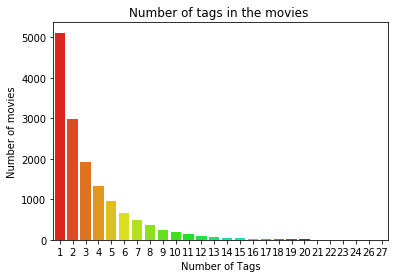

In [21]:
sns.countplot(pure_df['tags_count'], palette='gist_rainbow')
plt.title("Number of tags in the movies ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of movies")
plt.show()

Maximum no of tags per movie is 27 <br>
Minimum no of tags per movie is 1 <br>
Average no of tags per movie is 3 <br>
Most of the movies having tags 1 <br>
2,3 tags with movies tooks next place 

<h3> Unique No of tags </h3>

In [22]:
pure_df['tags_2'] = pure_df['tags'].apply(lambda x : x.replace(' ', '').replace(',',' '))
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tags_vect = vectorizer.fit_transform(pure_df['tags_2'])
print("Number of data points :", tags_vect.shape[0])
print("Number of unique tags :", tags_vect.shape[1])

Number of data points : 14752
Number of unique tags : 71


In [23]:
tag_names = vectorizer.get_feature_names()
print("Some of the unique tags we have :", tag_names[:10])

Some of the unique tags we have : ['absurd', 'action', 'adultcomedy', 'allegory', 'alternatehistory', 'alternatereality', 'antiwar', 'atmospheric', 'autobiographical', 'avantgarde']


<h3> Number of times a movie tag apperead</h3>

In [24]:
freqs = tags_vect.sum(axis=0).A1
result = dict(zip(tag_names, freqs))
result

{'absurd': 270,
 'action': 659,
 'adultcomedy': 128,
 'allegory': 138,
 'alternatehistory': 102,
 'alternatereality': 205,
 'antiwar': 118,
 'atmospheric': 396,
 'autobiographical': 44,
 'avantgarde': 220,
 'blaxploitation': 74,
 'bleak': 211,
 'boring': 525,
 'brainwashing': 107,
 'christianfilm': 42,
 'claustrophobic': 84,
 'clever': 87,
 'comedy': 1858,
 'comic': 114,
 'cruelty': 442,
 'cult': 2647,
 'cute': 197,
 'dark': 405,
 'depressing': 205,
 'dramatic': 412,
 'entertaining': 749,
 'fantasy': 544,
 'feel-good': 76,
 'flashback': 2937,
 'goodversusevil': 874,
 'gothic': 441,
 'grindhousefilm': 66,
 'haunting': 149,
 'historical': 272,
 'historicalfiction': 139,
 'homemovie': 153,
 'horror': 485,
 'humor': 822,
 'insanity': 634,
 'inspiring': 118,
 'intrigue': 168,
 'magicalrealism': 54,
 'melodrama': 456,
 'murder': 5762,
 'mystery': 519,
 'neonoir': 745,
 'nonfiction': 37,
 'paranormal': 546,
 'philosophical': 228,
 'plottwist': 205,
 'pornographic': 163,
 'prank': 255,
 'psych

If we observe tags in above dictionary we got same tags with different counts its not duplicate there are some movies which contains same kind tags category or that tag belongs to one of movie sub category 

In [15]:
tags_counts = pd.DataFrame(result.items(),columns=['tags','counts'])
tags_sorted = tags_counts.sort_values(['counts'],ascending=False)
tags_sorted.head(3)

,tags,counts
43,murder,5762
68,violence,4420
28,flashback,2937


<h3> Most frequent tags </h3>

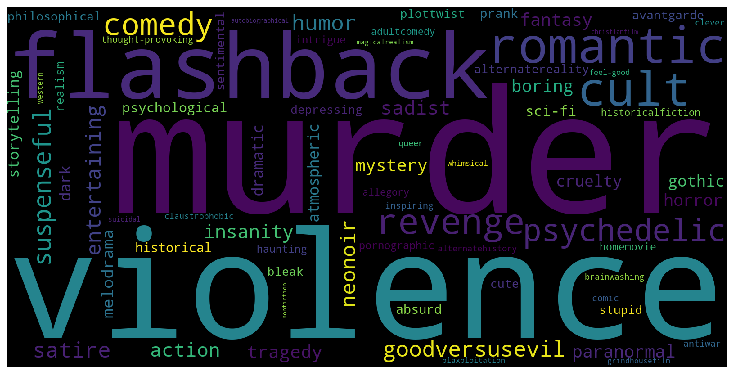

In [16]:
# Ploting word cloud
# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

If we observe above wordcloud most frequent 5 tags are **violance**, **murder**, **cult**, **revenge**, **flashback**

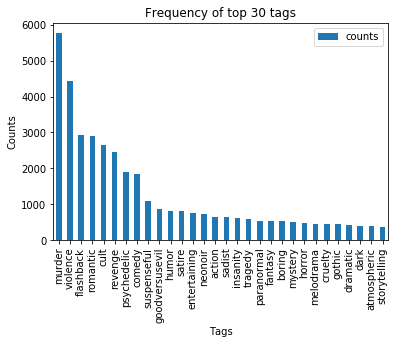

In [17]:
i=np.arange(30)
tags_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 30 tags')
plt.xticks(i, tags_sorted['tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

Most of the frequent movie tags are **Murder**, **violence**, **cult**, **flashback**, **romantic**, **revenge** <br>




<h2> Data Cleaning </h2>

In [25]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [26]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [27]:
!pip install tqdm

In [28]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [29]:
pure_df.head(3)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,tags_count,tags_2
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,5,cult horror gothic murder atmospheric
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1,violence
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1,romantic


We considering only tile ,plot_synopsis, tags for modeling rest of feature are not much useful

In [30]:
pure_df['pre_pro_title'] = preprocess_text(pure_df['title'].values)
pure_df['pre_pro_plot_synopsis'] = preprocess_text(pure_df['plot_synopsis'].values)

100%|██████████| 14752/14752 [00:30<00:00, 486.35it/s]


In [31]:
pure_df['pre_pro_tags'] = pure_df['tags'].apply(lambda x : x.replace(' ', '').replace(',',' ')) 

In [32]:
pure_df.head(3)


,imdb_id,title,plot_synopsis,tags,split,synopsis_source,tags_count,tags_2,pre_pro_title,pre_pro_plot_synopsis,pre_pro_tags
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,5,cult horror gothic murder atmospheric,tre volti della paura,note synopsis orginal italian release segments...,cult horror gothic murder atmospheric
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1,violence,dungeons dragons book vile darkness,two thousand years ago nhagruul foul sorcerer ...,violence
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1,romantic,shop around corner,matuschek gift store budapest workplace alfred...,romantic


In [34]:
pure_df.to_csv('pure_df.csv')

In [4]:
pure_df = pd.read_csv('pure_df.csv')

<h3>Converting tags for multilabel problems</h3>

In [0]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(pure_df['pre_pro_tags'])
multilabel_y.shape

(14752, 71)

In [0]:
X = pure_df.drop(['pre_pro_tags'],axis=1) 
Y = multilabel_y 

In [0]:
x_train_data, x_test, y_train_data, y_test = train_test_split(X, Y, test_size=0.20, random_state=42) 

In [0]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train_data, y_train_data, test_size=0.20, random_state=42)

In [0]:
print('train_data shape',x_train.shape,y_train.shape)
print('train_data shape',x_cv.shape,y_cv.shape)
print('test_data shape',x_test.shape,y_test.shape)

train_data shape (9440, 1) (9440, 71)
train_data shape (2361, 1) (2361, 71)
test_data shape (2951, 1) (2951, 71)


In [0]:
import pickle
pickle_out_1 = open("y_train.pickle","wb")
pickle_out_2 = open("y_test.pickle","wb")
pickle_out_3 = open("y_cv.pickle","wb")

pickle.dump(y_train, pickle_out_1)
pickle.dump(y_test, pickle_out_2)
pickle.dump(y_cv, pickle_out_3)



In [0]:
pickle_in_1 = open("y_train.pickle","rb")
pickle_in_2 = open("y_test.pickle","rb")
pickle_in_3 = open("y_cv.pickle","rb")

y_train = pickle.load(pickle_in_1) 
y_test = pickle.load(pickle_in_2) 
y_cv = pickle.load(pickle_in_3) 

<h2>Applying Bow vectorizer on train and test </h2>

In [0]:
vectorizer = CountVectorizer(min_df=10)
xb_train_multilabel = vectorizer.fit_transform(x_train['pre_pro_plot_synopsis'])
xb_test_multilabel = vectorizer.transform(x_test['pre_pro_plot_synopsis'])
xb_cv_multilabel = vectorizer.transform(x_cv['pre_pro_plot_synopsis'])

print('bow_train data',xb_train_multilabel.shape,y_train.shape)
print('bow_cv data',xb_cv_multilabel.shape,y_cv.shape)
print('bow_test data',xb_test_multilabel.shape,y_test.shape)

bow_train data (9440, 21220) (9440, 71)
bow_cv data (2361, 21220) (2361, 71)
bow_test data (2951, 21220) (2951, 71)


In [0]:
pickle_out_1 = open("bow_train.pickle","wb")
pickle_out_2 = open("bow_cv.pickle","wb")
pickle_out_3 = open("bow_test.pickle","wb")

pickle.dump(xb_train_multilabel, pickle_out_1)
pickle.dump(xb_cv_multilabel, pickle_out_2)
pickle.dump(xb_test_multilabel, pickle_out_3)



In [0]:
pickle_in_1 = open("bow_train.pickle","rb")
pickle_in_2 = open("bow_cv.pickle","rb")
pickle_in_3 = open("bow_test.pickle","rb")

xb_train_multilabel = pickle.load(pickle_in_1) 
xb_cv_multilabel = pickle.load(pickle_in_2) 
xb_test_multilabel = pickle.load(pickle_in_3) 

<h2>Applying TFIDF vectorizer on train and test </h2>

In [0]:
tf_idf_vect  = TfidfVectorizer(min_df=10)
xt_train_multilabel = tf_idf_vect.fit_transform(x_train['pre_pro_plot_synopsis'])
xt_cv_multilabel = tf_idf_vect.transform(x_cv['pre_pro_plot_synopsis'])
xt_test_multilabel = tf_idf_vect.transform(x_test['pre_pro_plot_synopsis'])
print('tfidf_train data',xt_train_multilabel.shape,y_train.shape)
print('tfidf_cv data',xt_cv_multilabel.shape,y_cv.shape)
print('tfidf_test data',xt_test_multilabel.shape,y_test.shape)

tfidf_train data (9440, 21220) (9440, 71)
tfidf_cv data (2361, 21220) (2361, 71)
tfidf_test data (2951, 21220) (2951, 71)


In [0]:
pickle_out_1 = open("tfidf_train.pickle","wb")
pickle_out_2 = open("tfidf_cv.pickle","wb")
pickle_out_3 = open("tfidf_test.pickle","wb")

pickle.dump(xt_train_multilabel, pickle_out_1)
pickle.dump(xt_cv_multilabel, pickle_out_2)
pickle.dump(xt_test_multilabel, pickle_out_3)



In [0]:
pickle_in_1 = open("tfidf_train.pickle","rb")
pickle_in_2 = open("tfidf_cv.pickle","rb")
pickle_in_3 = open("tfidf_test.pickle","rb")

xt_train_multilabel = pickle.load(pickle_in_1) 
xt_cv_multilabel = pickle.load(pickle_in_2) 
xt_test_multilabel = pickle.load(pickle_in_3) 

<h3>AVG W2V </h3>

In [0]:
#train_data
cleantext_train= x_train['pre_pro_plot_synopsis'] # building own text corpus from w2v train data  
i=0
list_of_sentance_train=[]
for sentance_train in cleantext_train:
    list_of_sentance_train.append(sentance_train.split())
print("cleantext train data")

#cv_data
cleantext_cv= x_cv['pre_pro_plot_synopsis'] # building own text corpus from w2v train data  
j=0
list_of_sentance_cv=[]
for sentance_cv in cleantext_cv:
    list_of_sentance_cv.append(sentance_cv.split())
print("cleantext cv data")

#test data
cleantext_test= x_test['pre_pro_plot_synopsis'] # building own text corpus from w2v test data  
k=0
list_of_sentance_test=[]
for sentance_test in cleantext_test:
    list_of_sentance_test.append(sentance_test.split())
print("cleantext test data")


#WORD2VEC USING OWN CORPUS FROM ABOVE DATA 
w2v_train_model=Word2Vec(list_of_sentance_train,min_count=5,size=50, workers=4)

#creating words only on train data 
w2v_words_train = list(w2v_train_model.wv.vocab)

cleantext train data
cleantext cv data
cleantext test data


In [0]:
# average Word2Vec train data 
# compute average word2vec_train for each synopsis.

sent_vectors_train = []; 
final_avgw2v_train_data=sent_vectors_train
for sent_train in tqdm(list_of_sentance_train):
  sent_vec_train = np.zeros(50) 
  cnt_words_train =0; 
  for word_train in sent_train:
    if word_train in w2v_words_train:
      vec_train = w2v_train_model.wv[word_train]
      sent_vec_train += vec_train
      cnt_words_train += 1
  if cnt_words_train != 0:
    sent_vec_train /= cnt_words_train
  sent_vectors_train.append(sent_vec_train)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))
print(type(sent_vectors_train))

100%|██████████| 9440/9440 [11:52<00:00, 13.24it/s]

9440
50
<class 'list'>


In [0]:
pickle_out = open("train_avgw2v.pickle","wb")
pickle.dump(final_avgw2v_train_data, pickle_out)
pickle_out.close()   

In [0]:
pickle_in = open("train_avgw2v.pickle","rb")
final_avgw2v_train_data = pickle.load(pickle_in)

In [0]:
# average Word2Vec train data 
# compute average word2vec_train for each synopsis.
#avgw2v cv data 
sent_vectors_cv = []; 
final_avgw2v_cv_data=sent_vectors_cv
for sent_cv in tqdm(list_of_sentance_cv):
  sent_vec_cv = np.zeros(50) 
  cnt_words_cv =0; 
  for word_cv in sent_cv:
    if word_cv in w2v_words_train:
      vec_cv = w2v_train_model.wv[word_cv]
      sent_vec_cv += vec_cv
      cnt_words_cv += 1
  if cnt_words_cv != 0:
    sent_vec_cv /= cnt_words_cv
  sent_vectors_cv.append(sent_vec_cv)
print(len(sent_vectors_cv))
print(len(sent_vectors_cv[0]))
print(type(sent_vectors_cv))

100%|██████████| 2361/2361 [03:10<00:00, 11.72it/s]

2361
50
<class 'list'>


In [0]:
pickle_out = open("cv_avgw2v.pickle","wb")
pickle.dump(final_avgw2v_cv_data, pickle_out)
pickle_out.close() 

In [0]:
pickle_in = open("cv_avgw2v.pickle","rb")
final_avgw2v_cv_data = pickle.load(pickle_in)

In [0]:
# average Word2Vec test data 
sent_vectors_test = []; 
final_avgw2v_test_data=sent_vectors_test
for sent_test in tqdm(list_of_sentance_test): 
    sent_vec_test = np.zeros(50) 
    cnt_words_test =0;
    for word_test in sent_test: 
        if word_test in w2v_words_train:
            vec_test = w2v_train_model.wv[word_test]
            sent_vec_test += vec_test
            cnt_words_test += 1
    if cnt_words_test != 0:
        sent_vec_test /= cnt_words_test
    sent_vectors_test.append(sent_vec_test)

print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))
print(type(sent_vectors_test))

100%|██████████| 2951/2951 [03:53<00:00, 16.10it/s]

2951
50
<class 'list'>


In [0]:
pickle_out = open("test_avgw2v.pickle","wb")
pickle.dump(final_avgw2v_test_data, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("test_avgw2v.pickle","rb")
final_avgw2v_test_data = pickle.load(pickle_in)

In [0]:

tfidfw2v_model_train = TfidfVectorizer()
final_tfidfw2v_train=tfidfw2v_model_train.fit(x_train['pre_pro_plot_synopsis'])
dictionary_train = dict(zip(final_tfidfw2v_train.get_feature_names(), list(final_tfidfw2v_train.idf_)))

# TF-IDF weighted Word2Vec on train
tfidf_feat_train = final_tfidfw2v_train.get_feature_names() # tfidf words/col-names

tfidf_sent_vectors_train = [];
final_tfidfw2v_train_data=tfidf_sent_vectors_train
row=0;''
for sent_train in tqdm(list_of_sentance_train): 
    sent_vec_train = np.zeros(50) 
    weight_sum_train =0; 
    for word in sent_train: 
        if word in w2v_words_train and word in tfidf_feat_train:
            vec_train = w2v_train_model.wv[word]
            tf_idf_train = dictionary_train[word]*(sent_train.count(word)/len(sent_train))
            sent_vec_train += (vec_train * tf_idf_train)
            weight_sum_train += tf_idf_train  
    if weight_sum_train != 0:
      sent_vec_train /= weight_sum_train
    tfidf_sent_vectors_train.append(sent_vec_train)
    row += 1
print(len(sent_vec_train))
print(len(tfidf_sent_vectors_train))  
print(type(tfidf_sent_vectors_train))

100%|██████████| 9440/9440 [1:38:20<00:00,  1.37it/s]

50
9440
<class 'list'>


In [0]:
pickle_out = open("train_tfidfavgw2v.pickle","wb")
pickle.dump(final_tfidfw2v_train_data, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("train_tfidfavgw2v.pickle","rb")
final_tfidfw2v_train_data = pickle.load(pickle_in)

In [0]:
#tfidfw2v cv data 
tfidfw2v_model_train = TfidfVectorizer()
final_tfidfw2v_train=tfidfw2v_model_train.fit(x_train['pre_pro_plot_synopsis'])
dictionary_train = dict(zip(final_tfidfw2v_train.get_feature_names(), list(final_tfidfw2v_train.idf_)))

# TF-IDF weighted Word2Vec on train
tfidf_feat_cv = final_tfidfw2v_train.get_feature_names() # tfidf words/col-names

tfidf_sent_vectors_cv = [];
final_tfidfw2v_cv_data=tfidf_sent_vectors_cv
row=0;''
for sent_cv in tqdm(list_of_sentance_cv): 
    sent_vec_cv = np.zeros(50) 
    weight_sum_cv =0; 
    for word in sent_cv: 
        if word in w2v_words_train and word in tfidf_feat_cv:
            vec_cv = w2v_train_model.wv[word]
            tf_idf_cv = dictionary_train[word]*(sent_cv.count(word)/len(sent_cv))
            sent_vec_cv += (vec_cv * tf_idf_cv)
            weight_sum_cv += tf_idf_cv  
    if weight_sum_cv != 0:
      sent_vec_cv /= weight_sum_cv
    tfidf_sent_vectors_cv.append(sent_vec_cv)
    row += 1
print(len(sent_vec_cv))
print(len(tfidf_sent_vectors_cv))  
print(type(tfidf_sent_vectors_cv))

100%|██████████| 2361/2361 [25:57<00:00,  1.05s/it]

50
2361
<class 'list'>


In [0]:
pickle_out = open("cv_tfidfavgw2v.pickle","wb")
pickle.dump(final_tfidfw2v_cv_data, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("cv_tfidfavgw2v.pickle","rb")
final_tfidfw2v_cv_data = pickle.load(pickle_in)

In [0]:
#tfidf_test_data using  train model

tfidfw2v_model_train = TfidfVectorizer()
final_tfidfw2v_train=tfidfw2v_model_train.fit(x_train['pre_pro_plot_synopsis'])
dictionary_train = dict(zip(final_tfidfw2v_train.get_feature_names(), list(final_tfidfw2v_train.idf_))) 

#tfidfw2v on test data 
tfidf_feat_test = final_tfidfw2v_train.get_feature_names() # tfidf words/col-names

tfidf_sent_vectors_test = []; 
final_tfidfw2v_test_data=tfidf_sent_vectors_test
row=0;
for sent_test in tqdm(list_of_sentance_test): 
    sent_vec_test = np.zeros(50) 
    weight_sum_test =0; 
    for word_test in sent_test: 
        if word_test in w2v_words_train and word_test in tfidf_feat_test:
            vec_test = w2v_train_model.wv[word_test]
            tf_idf_test = dictionary_train[word_test]*(sent_test.count(word_test)/len(sent_test))
            sent_vec_test += (vec_test * tf_idf_test)
            weight_sum_test += tf_idf_test
    if weight_sum_test != 0:
        sent_vec_test /= weight_sum_test
    tfidf_sent_vectors_test.append(sent_vec_test)
    row += 1
print(len(sent_vec_test))
print(len(tfidf_sent_vectors_test))  
print(type(tfidf_sent_vectors_test))

100%|██████████| 2951/2951 [32:42<00:00,  2.55it/s]

50
2951
<class 'list'>


In [0]:
pickle_out = open("test_tfidfavgw2v.pickle","wb")
pickle.dump(final_tfidfw2v_test_data, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("test_tfidfavgw2v.pickle","rb")
final_tfidfw2v_test_data = pickle.load(pickle_in)

<h2> Logistic Regression BOW</h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(LogisticRegression(C=i, penalty='l1',class_weight='balanced'))
  classifier.fit(xb_train_multilabel, y_train)
  train_predictions = classifier.predict (xb_train_multilabel)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(xb_cv_multilabel)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.0064, Cv_f1_score: 0.0052
for 0.001 Train_f1_score: 0.1228, Cv_f1_score: 0.1167
for 0.01 Train_f1_score: 0.3817, Cv_f1_score: 0.2680
for 0.1 Train_f1_score: 0.7761, Cv_f1_score: 0.3156
for 1 Train_f1_score: 0.9707, Cv_f1_score: 0.2969
for 10 Train_f1_score: 0.9712, Cv_f1_score: 0.2941
for 100 Train_f1_score: 0.9712, Cv_f1_score: 0.2963
for 1000 Train_f1_score: 0.9712, Cv_f1_score: 0.2889
for 10000 Train_f1_score: 0.9712, Cv_f1_score: 0.2653
CPU times: user 23min 54s, sys: 822 ms, total: 23min 54s
Wall time: 23min 57s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 0.1


In [0]:
classifier = OneVsRestClassifier(LogisticRegression(C=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(xb_train_multilabel, y_train)
predictions = classifier.predict (xb_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.024737377160284648
Hamming loss  0.06992139212775808
Micro-average :
Precision: 0.2801, Recall: 0.4037, F1-measure: 0.3307


<h2> Logistic Regression TFIDF</h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(LogisticRegression(C=i, penalty='l1',class_weight='balanced'))
  classifier.fit(xt_train_multilabel, y_train)
  train_predictions = classifier.predict (xt_train_multilabel)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(xt_cv_multilabel)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.0000, Cv_f1_score: 0.0000
for 0.001 Train_f1_score: 0.0000, Cv_f1_score: 0.0000
for 0.01 Train_f1_score: 0.0031, Cv_f1_score: 0.0030
for 0.1 Train_f1_score: 0.2321, Cv_f1_score: 0.1847
for 1 Train_f1_score: 0.5507, Cv_f1_score: 0.2966
for 10 Train_f1_score: 0.9336, Cv_f1_score: 0.2958
for 100 Train_f1_score: 0.9711, Cv_f1_score: 0.2846
for 1000 Train_f1_score: 0.9712, Cv_f1_score: 0.2866
for 10000 Train_f1_score: 0.9712, Cv_f1_score: 0.2852
CPU times: user 23min 34s, sys: 452 ms, total: 23min 35s
Wall time: 23min 37s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 1


In [0]:
%%time
classifier = OneVsRestClassifier(LogisticRegression(C=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(xt_train_multilabel, y_train)
predictions = classifier.predict (xt_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.012199254490003388
Hamming loss  0.08616797361600985
Micro-average :
Precision: 0.2360, Recall: 0.4530, F1-measure: 0.3103
CPU times: user 35.9 s, sys: 25.8 ms, total: 35.9 s
Wall time: 36 s


<h2> Logistic Regression AVGW2V</h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(LogisticRegression(C=i, penalty='l1',class_weight='balanced'))
  classifier.fit(final_avgw2v_train_data, y_train)
  train_predictions = classifier.predict (final_avgw2v_train_data)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(final_avgw2v_cv_data)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.0000, Cv_f1_score: 0.0000
for 0.001 Train_f1_score: 0.0000, Cv_f1_score: 0.0000
for 0.01 Train_f1_score: 0.1510, Cv_f1_score: 0.1441
for 0.1 Train_f1_score: 0.1799, Cv_f1_score: 0.1689
for 1 Train_f1_score: 0.1877, Cv_f1_score: 0.1757
for 10 Train_f1_score: 0.1880, Cv_f1_score: 0.1760
for 100 Train_f1_score: 0.1880, Cv_f1_score: 0.1761
for 1000 Train_f1_score: 0.1880, Cv_f1_score: 0.1761
for 10000 Train_f1_score: 0.1880, Cv_f1_score: 0.1761
CPU times: user 1h 11min 29s, sys: 7.43 s, total: 1h 11min 37s
Wall time: 1h 11min 34s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 100


In [0]:
%%time
classifier = OneVsRestClassifier(LogisticRegression(C=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(final_avgw2v_train_data, y_train)
predictions = classifier.predict (final_avgw2v_test_data)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.0
Hamming loss  0.25055245058967834
Micro-average :
Precision: 0.1061, Recall: 0.6536, F1-measure: 0.1825
CPU times: user 14min 47s, sys: 335 ms, total: 14min 47s
Wall time: 14min 48s


<h2> Logistic Regression TFIDFW2V</h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(LogisticRegression(C=i, penalty='l1',class_weight='balanced'))
  classifier.fit(final_tfidfw2v_train_data, y_train)
  train_predictions = classifier.predict (final_tfidfw2v_train_data)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(final_tfidfw2v_cv_data)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.0000, Cv_f1_score: 0.0000
for 0.001 Train_f1_score: 0.0033, Cv_f1_score: 0.0030
for 0.01 Train_f1_score: 0.1429, Cv_f1_score: 0.1299
for 0.1 Train_f1_score: 0.1658, Cv_f1_score: 0.1436
for 1 Train_f1_score: 0.1689, Cv_f1_score: 0.1429
for 10 Train_f1_score: 0.1690, Cv_f1_score: 0.1425
for 100 Train_f1_score: 0.1690, Cv_f1_score: 0.1425
for 1000 Train_f1_score: 0.1689, Cv_f1_score: 0.1425
for 10000 Train_f1_score: 0.1689, Cv_f1_score: 0.1425
CPU times: user 8min 10s, sys: 6.93 s, total: 8min 16s
Wall time: 8min 9s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 0.1


In [0]:
%%time
classifier = OneVsRestClassifier(LogisticRegression(C=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(final_tfidfw2v_train_data, y_train)
predictions = classifier.predict (final_tfidfw2v_test_data)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.0
Hamming loss  0.27251206322993876
Micro-average :
Precision: 0.0888, Recall: 0.5792, F1-measure: 0.1539
CPU times: user 40.8 s, sys: 250 ms, total: 41.1 s
Wall time: 40.9 s


<h2> SGD with hinge loss BOW (SVM)  </h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=i, penalty='l1',class_weight='balanced'))
  classifier.fit(xb_train_multilabel, y_train)
  train_predictions = classifier.predict(xb_train_multilabel)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(xb_cv_multilabel)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.6884, Cv_f1_score: 0.2306
for 0.001 Train_f1_score: 0.4407, Cv_f1_score: 0.1967
for 0.01 Train_f1_score: 0.2081, Cv_f1_score: 0.1453
for 0.1 Train_f1_score: 0.1057, Cv_f1_score: 0.0988
for 1 Train_f1_score: 0.0713, Cv_f1_score: 0.0672
for 10 Train_f1_score: 0.1335, Cv_f1_score: 0.1282
for 100 Train_f1_score: 0.1779, Cv_f1_score: 0.1717
for 1000 Train_f1_score: 0.0570, Cv_f1_score: 0.0604
for 10000 Train_f1_score: 0.2757, Cv_f1_score: 0.2690
CPU times: user 2h 9min 58s, sys: 1min 3s, total: 2h 11min 2s
Wall time: 2h 9min 59s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 10000


In [0]:
%%time
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(xb_train_multilabel, y_train)
predictions = classifier.predict (xb_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.011521518129447645
Hamming loss  0.05204251602464669
Micro-average :
Precision: 0.1718, Recall: 0.0565, F1-measure: 0.0851
CPU times: user 16.7 s, sys: 7 s, total: 23.7 s
Wall time: 15.7 s


<h2> SGD with hinge loss TFIDF (SVM)  </h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=i, penalty='l1',class_weight='balanced'))
  classifier.fit(xt_train_multilabel, y_train)
  train_predictions = classifier.predict (xt_train_multilabel)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(xt_cv_multilabel)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.5430, Cv_f1_score: 0.2600
for 0.001 Train_f1_score: 0.2101, Cv_f1_score: 0.1444
for 0.01 Train_f1_score: 0.0907, Cv_f1_score: 0.0863
for 0.1 Train_f1_score: 0.0957, Cv_f1_score: 0.0938
for 1 Train_f1_score: 0.0783, Cv_f1_score: 0.0756
for 10 Train_f1_score: 0.1327, Cv_f1_score: 0.1296
for 100 Train_f1_score: 0.1538, Cv_f1_score: 0.1518
for 1000 Train_f1_score: 0.2494, Cv_f1_score: 0.2414
for 10000 Train_f1_score: 0.0908, Cv_f1_score: 0.0873
CPU times: user 8min 35s, sys: 1min 2s, total: 9min 37s
Wall time: 8min 25s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 0.0001


In [0]:
%%time
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(xt_train_multilabel, y_train)
predictions = classifier.predict (xt_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.006438495425279567
Hamming loss  0.10084430677593177
Micro-average :
Precision: 0.1938, Recall: 0.4292, F1-measure: 0.2670
CPU times: user 3min 49s, sys: 6.89 s, total: 3min 55s
Wall time: 3min 48s


<h2> SGD with hinge loss AVGW2V (SVM)  </h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=i, penalty='l1',class_weight='balanced'))
  classifier.fit(final_avgw2v_train_data, y_train)
  train_predictions = classifier.predict (final_avgw2v_train_data)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(final_avgw2v_cv_data)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.1558, Cv_f1_score: 0.1453
for 0.001 Train_f1_score: 0.1671, Cv_f1_score: 0.1563
for 0.01 Train_f1_score: 0.1483, Cv_f1_score: 0.1412
for 0.1 Train_f1_score: 0.0738, Cv_f1_score: 0.0728
for 1 Train_f1_score: 0.0618, Cv_f1_score: 0.0614
for 10 Train_f1_score: 0.0515, Cv_f1_score: 0.0488
for 100 Train_f1_score: 0.1325, Cv_f1_score: 0.1295
for 1000 Train_f1_score: 0.1494, Cv_f1_score: 0.1484
for 10000 Train_f1_score: 0.1645, Cv_f1_score: 0.1583
CPU times: user 1min 24s, sys: 6.77 s, total: 1min 31s
Wall time: 1min 23s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 10000


In [0]:
%%time
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(final_avgw2v_train_data, y_train)
predictions = classifier.predict (final_avgw2v_test_data)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.00711623178583531
Hamming loss  0.05608984302289508
Micro-average :
Precision: 0.0281, Recall: 0.0093, F1-measure: 0.0139
CPU times: user 2.96 s, sys: 204 ms, total: 3.16 s
Wall time: 2.93 s


<h2> SGD with hinge loss TFIDFW2V (SVM)  </h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=i, penalty='l1',class_weight='balanced'))
  classifier.fit(final_tfidfw2v_train_data, y_train)
  train_predictions = classifier.predict (final_tfidfw2v_train_data)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(final_tfidfw2v_cv_data)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.1439, Cv_f1_score: 0.1209
for 0.001 Train_f1_score: 0.1476, Cv_f1_score: 0.1272
for 0.01 Train_f1_score: 0.1377, Cv_f1_score: 0.1209
for 0.1 Train_f1_score: 0.0585, Cv_f1_score: 0.0566
for 1 Train_f1_score: 0.0822, Cv_f1_score: 0.0793
for 10 Train_f1_score: 0.1027, Cv_f1_score: 0.0969
for 100 Train_f1_score: 0.1141, Cv_f1_score: 0.1103
for 1000 Train_f1_score: 0.1494, Cv_f1_score: 0.1475
for 10000 Train_f1_score: 0.2546, Cv_f1_score: 0.2479
CPU times: user 1min 50s, sys: 6.97 s, total: 1min 57s
Wall time: 1min 49s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 10000


In [0]:
%%time
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(final_tfidfw2v_train_data, y_train)
predictions = classifier.predict (final_tfidfw2v_test_data)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.0
Hamming loss  0.09095985605261525
Micro-average :
Precision: 0.1580, Recall: 0.2601, F1-measure: 0.1966
CPU times: user 3.17 s, sys: 240 ms, total: 3.41 s
Wall time: 3.16 s


<h2> SGD with log loss BOW (Logistic)  </h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=i, penalty='l1',class_weight='balanced'))
  classifier.fit(xb_train_multilabel, y_train)
  train_predictions = classifier.predict (xb_train_multilabel)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(xb_cv_multilabel)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.6881, Cv_f1_score: 0.2343
for 0.001 Train_f1_score: 0.4347, Cv_f1_score: 0.1975
for 0.01 Train_f1_score: 0.1972, Cv_f1_score: 0.1431
for 0.1 Train_f1_score: 0.0986, Cv_f1_score: 0.0932
for 1 Train_f1_score: 0.0677, Cv_f1_score: 0.0634
for 10 Train_f1_score: 0.1014, Cv_f1_score: 0.0982
for 100 Train_f1_score: 0.1854, Cv_f1_score: 0.1838
for 1000 Train_f1_score: 0.0157, Cv_f1_score: 0.0166
for 10000 Train_f1_score: 0.1193, Cv_f1_score: 0.1176
CPU times: user 2h 26min 13s, sys: 1min 3s, total: 2h 27min 17s
Wall time: 2h 26min 15s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 0.0001


In [0]:
%%time
classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(xb_train_multilabel, y_train)
predictions = classifier.predict (xb_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.0057607590647238225
Hamming loss  0.08834436643582266
Micro-average :
Precision: 0.1908, Recall: 0.3283, F1-measure: 0.2413
CPU times: user 33min 58s, sys: 7.26 s, total: 34min 5s
Wall time: 34min


<h2> SGD with log loss TFIDF (Logistic)  </h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=i, penalty='l1',class_weight='balanced'))
  classifier.fit(xt_train_multilabel, y_train)
  train_predictions = classifier.predict (xt_train_multilabel)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(xt_cv_multilabel)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.4890, Cv_f1_score: 0.2641
for 0.001 Train_f1_score: 0.2138, Cv_f1_score: 0.1694
for 0.01 Train_f1_score: 0.1009, Cv_f1_score: 0.0999
for 0.1 Train_f1_score: 0.0840, Cv_f1_score: 0.0822
for 1 Train_f1_score: 0.1334, Cv_f1_score: 0.1285
for 10 Train_f1_score: 0.0316, Cv_f1_score: 0.0323
for 100 Train_f1_score: 0.1362, Cv_f1_score: 0.1353
for 1000 Train_f1_score: 0.2148, Cv_f1_score: 0.2140
for 10000 Train_f1_score: 0.2228, Cv_f1_score: 0.2184
CPU times: user 6min 3s, sys: 1min 2s, total: 7min 5s
Wall time: 5min 53s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 0.0001


In [0]:
%%time
classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(xt_train_multilabel, y_train)
predictions = classifier.predict (xt_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.004744154523890207
Hamming loss  0.10420912462235289
Micro-average :
Precision: 0.1939, Recall: 0.4547, F1-measure: 0.2719
CPU times: user 3min 17s, sys: 6.92 s, total: 3min 24s
Wall time: 3min 16s


<h2> SGD with log loss AVGW2V (Logistic)  </h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=i, penalty='l1',class_weight='balanced'))
  classifier.fit(final_avgw2v_train_data, y_train)
  train_predictions = classifier.predict (final_avgw2v_train_data)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(final_avgw2v_cv_data)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.1719, Cv_f1_score: 0.1601
for 0.001 Train_f1_score: 0.1734, Cv_f1_score: 0.1643
for 0.01 Train_f1_score: 0.1443, Cv_f1_score: 0.1381
for 0.1 Train_f1_score: 0.1128, Cv_f1_score: 0.1102
for 1 Train_f1_score: 0.0901, Cv_f1_score: 0.0884
for 10 Train_f1_score: 0.1107, Cv_f1_score: 0.1089
for 100 Train_f1_score: 0.0810, Cv_f1_score: 0.0843
for 1000 Train_f1_score: 0.1216, Cv_f1_score: 0.1206
for 10000 Train_f1_score: 0.0259, Cv_f1_score: 0.0235
CPU times: user 1min 43s, sys: 6.55 s, total: 1min 49s
Wall time: 1min 42s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 0.001


In [0]:
%%time
classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(final_avgw2v_train_data, y_train)
predictions = classifier.predict (final_avgw2v_test_data)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.0
Hamming loss  0.2740393564368249
Micro-average :
Precision: 0.0958, Recall: 0.6399, F1-measure: 0.1666
CPU times: user 12.7 s, sys: 238 ms, total: 13 s
Wall time: 12.7 s


<h2> SGD with log loss TFIDFW2V (Logistic)  </h2>

In [0]:
#hyperparameter tuning
%%time
train_f1 = []
cv_f1 = []
parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in parameters:
  classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=i, penalty='l1',class_weight='balanced'))
  classifier.fit(final_tfidfw2v_train_data, y_train)
  train_predictions = classifier.predict (final_tfidfw2v_train_data)
  train_f1_score = f1_score(y_train, train_predictions, average='micro')
  train_f1.append(train_f1_score)
  cv_predictions = classifier.predict(final_tfidfw2v_cv_data)
  cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
  cv_f1.append(cv_f1_score)
  print("for",i,"Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))


for 0.0001 Train_f1_score: 0.1457, Cv_f1_score: 0.1241
for 0.001 Train_f1_score: 0.1571, Cv_f1_score: 0.1361
for 0.01 Train_f1_score: 0.1321, Cv_f1_score: 0.1181
for 0.1 Train_f1_score: 0.0682, Cv_f1_score: 0.0670
for 1 Train_f1_score: 0.0720, Cv_f1_score: 0.0700
for 10 Train_f1_score: 0.0798, Cv_f1_score: 0.0791
for 100 Train_f1_score: 0.2086, Cv_f1_score: 0.2058
for 1000 Train_f1_score: 0.1514, Cv_f1_score: 0.1492
for 10000 Train_f1_score: 0.0081, Cv_f1_score: 0.0080
CPU times: user 2min 7s, sys: 6.71 s, total: 2min 14s
Wall time: 2min 7s


In [0]:
best_estimators = np.argmax(cv_f1)
print('best parameter :',parameters[best_estimators])

best parameter : 100


In [0]:
%%time
classifier = OneVsRestClassifier(SGDClassifier(loss='log',alpha=parameters[best_estimators], penalty='l1',class_weight='balanced'))
classifier.fit(final_tfidfw2v_train_data, y_train)
predictions = classifier.predict (final_tfidfw2v_test_data)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy : 0.0
Hamming loss  0.09703561934125934
Micro-average :
Precision: 0.0186, Recall: 0.0245, F1-measure: 0.0212
CPU times: user 3.3 s, sys: 211 ms, total: 3.51 s
Wall time: 3.3 s


We observed Better results in logistic regression BOW and TFIDF however we used with simple loop method for hyper parameter tuning, now we trying with randomsearchcv let's see is there any change in model performance

In [5]:
train_data  = pure_df.loc[(pure_df['split'] == 'train') | (pure_df['split'] == 'val')]
test_data = pure_df.loc[(pure_df['split'] == 'test')]
y_train = train_data['pre_pro_tags']
y_test = test_data['pre_pro_tags']


<h3>TFIDF UNI Grams</h3>

In [0]:
# Randomsearchcv/Gridsearchcv tooks hrs to compute BOW,so we trying with TFIDF UNI BI TRI 
vectorizer_1 = TfidfVectorizer(min_df=0.00009,max_features=100000, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(1,1))
xt_train_multilabel_1 = vectorizer_1.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_1 = vectorizer_1.transform(test_data['pre_pro_plot_synopsis'])

vectorizer_1_1 = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true').fit(y_train)
y_train_1 = vectorizer_1_1.transform(y_train)
y_test_1 = vectorizer_1_1.transform(y_test)
print('model Started......!')

alpha = [0.001,0.01,0.1,0.5,0.9,1,1.5,10,100,1000]
penalty = ['l1','l2']

params  = {'estimator__C': alpha,
          'estimator__penalty': penalty}
clf_estimator_1 = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
RS_clf_1 = RandomizedSearchCV(estimator=clf_estimator_1, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
RS_clf_1.fit(xt_train_multilabel_1, y_train_1)
print('Best estimator: ',RS_clf_1.best_estimator_)
print('Best Cross Validation Score: ',RS_clf_1.best_score_) 

classifier_1 = RS_clf_1.best_estimator_
classifier_1.fit(xt_train_multilabel_1, y_train_1)
predictions_1 = classifier_1.predict(xt_test_multilabel_1)

print("Accuracy :",metrics.accuracy_score(y_test_1, predictions_1))
print("Hamming loss ",metrics.hamming_loss(y_test_1,predictions_1))

precision_1 = precision_score(y_test_1, predictions_1, average='micro')
recall_1 = recall_score(y_test_1, predictions_1, average='micro')
f1_1 = f1_score(y_test_1, predictions_1, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_1, recall_1, f1_1))
print('Model Ended......!')


model Started......!
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] estimator__penalty=l2, estimator__C=1.5 .........................
[CV] estimator__penalty=l2, estimator__C=1.5 .........................
[CV] estimator__penalty=l2, estimator__C=1.5 .........................
[CV] estimator__penalty=l2, estimator__C=1.5 .........................
[CV] estimator__penalty=l2, estimator__C=1.5 .........................
[CV] estimator__penalty=l1, estimator__C=100 .........................
[CV] estimator__penalty=l1, estimator__C=100 .........................
[CV] estimator__penalty=l1, estimator__C=100 .........................
[CV]  estimator__penalty=l2, estimator__C=1.5, score=0.364688378244338, total= 1.6min
[CV] estimator__penalty=l1, estimator__C=100 .........................
[CV]  estimator__penalty=l2, estimator__C=1.5, score=0.3599798330625736, total= 1.7min
[CV] estimator__penalty=l1, estimator__C=100 .........................


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.7min


[CV]  estimator__penalty=l2, estimator__C=1.5, score=0.31656584072263194, total= 1.8min
[CV] estimator__penalty=l1, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=1.5, score=0.33288948069241014, total= 1.9min
[CV] estimator__penalty=l1, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=1.5, score=0.3183091418385536, total= 1.9min
[CV] estimator__penalty=l1, estimator__C=0.001 .......................
[CV]  estimator__penalty=l1, estimator__C=0.001, score=0.0, total=  21.5s
[CV] estimator__penalty=l1, estimator__C=0.001 .......................
[CV]  estimator__penalty=l1, estimator__C=0.001, score=0.0, total=  21.4s
[CV] estimator__penalty=l1, estimator__C=0.001 .......................
[CV]  estimator__penalty=l1, estimator__C=0.001, score=0.0, total=  26.1s
[CV] estimator__penalty=l1, estimator__C=0.01 ........................
[CV]  estimator__penalty=l1, estimator__C=0.001, score=0.0, total=  25.6s
[CV] estimator_

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.6min


[CV]  estimator__penalty=l1, estimator__C=0.001, score=0.0, total=  25.3s
[CV] estimator__penalty=l1, estimator__C=0.01 ........................
[CV]  estimator__penalty=l1, estimator__C=0.01, score=0.00020684662322887577, total=  24.1s
[CV] estimator__penalty=l1, estimator__C=0.01 ........................
[CV]  estimator__penalty=l1, estimator__C=0.01, score=0.000990295107942167, total=  23.3s
[CV] estimator__penalty=l1, estimator__C=0.01 ........................
[CV]  estimator__penalty=l1, estimator__C=0.01, score=0.0026763525138596826, total=  26.7s
[CV] estimator__penalty=l1, estimator__C=1000 ........................
[CV]  estimator__penalty=l1, estimator__C=0.01, score=0.004440333024976873, total=  26.3s
[CV] estimator__penalty=l1, estimator__C=1000 ........................
[CV]  estimator__penalty=l1, estimator__C=0.01, score=0.0048543689320388345, total=  26.1s
[CV] estimator__penalty=l1, estimator__C=1000 ........................
[CV]  estimator__penalty=l1, estimator__C=100,

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.9min


[CV]  estimator__penalty=l1, estimator__C=100, score=0.2873071437832231, total= 3.9min
[CV] estimator__penalty=l1, estimator__C=1000 ........................
[CV]  estimator__penalty=l1, estimator__C=100, score=0.27534744893200264, total= 4.4min
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.3154285714285714, total=  27.8s
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.32826879130381076, total=  26.2s
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.24072733851999273, total=  34.8s
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l1, estimator__C=100, score=0.2818999182635546, total= 4.4min
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l1, estimator__C=1

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.6min


[CV]  estimator__penalty=l1, estimator__C=10, score=0.2983214021229326, total= 2.3min
[CV] estimator__penalty=l1, estimator__C=10 ..........................
[CV]  estimator__penalty=l1, estimator__C=10, score=0.30569047190741744, total= 2.2min
[CV] estimator__penalty=l1, estimator__C=10 ..........................
[CV]  estimator__penalty=l1, estimator__C=10, score=0.2811158798283262, total= 2.6min
[CV] estimator__penalty=l1, estimator__C=0.9 .........................
[CV]  estimator__penalty=l1, estimator__C=0.9, score=0.33964823438983593, total= 1.6min
[CV] estimator__penalty=l1, estimator__C=0.9 .........................
[CV]  estimator__penalty=l1, estimator__C=10, score=0.2908456843940715, total= 2.6min
[CV] estimator__penalty=l1, estimator__C=0.9 .........................
[CV]  estimator__penalty=l1, estimator__C=10, score=0.2844984802431611, total= 2.7min
[CV] estimator__penalty=l1, estimator__C=0.9 .........................
[CV]  estimator__penalty=l1, estimator__C=1000, score=0

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.5min


[CV]  estimator__penalty=l1, estimator__C=1000, score=0.27941442255557564, total= 8.7min
[CV] estimator__penalty=l1, estimator__C=0.1 .........................
[CV]  estimator__penalty=l1, estimator__C=1000, score=0.29092998021318695, total= 9.5min
[CV] estimator__penalty=l1, estimator__C=0.1 .........................
[CV]  estimator__penalty=l1, estimator__C=1000, score=0.28010590705742716, total= 8.9min
[CV] estimator__penalty=l1, estimator__C=0.1 .........................
[CV]  estimator__penalty=l1, estimator__C=0.9, score=0.28039190408663145, total= 1.8min
[CV] estimator__penalty=l1, estimator__C=0.5 .........................
[CV]  estimator__penalty=l1, estimator__C=0.9, score=0.2844550777560914, total= 1.7min
[CV] estimator__penalty=l1, estimator__C=0.5 .........................
[CV]  estimator__penalty=l1, estimator__C=0.1, score=0.20691214713752684, total= 1.4min
[CV] estimator__penalty=l1, estimator__C=0.5 .........................
[CV]  estimator__penalty=l1, estimator__C=0.

[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 13.8min remaining:  3.0min


[CV]  estimator__penalty=l1, estimator__C=0.9, score=0.28207042428766954, total= 1.7min
[CV] estimator__penalty=l1, estimator__C=0.5 .........................
[CV]  estimator__penalty=l1, estimator__C=0.1, score=0.1612721643681396, total= 1.3min
[CV]  estimator__penalty=l1, estimator__C=0.1, score=0.1668249145461451, total= 1.4min
[CV]  estimator__penalty=l1, estimator__C=0.1, score=0.1642714380888931, total= 1.5min
[CV]  estimator__penalty=l1, estimator__C=0.5, score=0.32779930654701206, total= 1.5min
[CV]  estimator__penalty=l1, estimator__C=0.5, score=0.33518161362905824, total= 1.3min


[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 14.7min remaining:   56.3s


[CV]  estimator__penalty=l1, estimator__C=0.5, score=0.2623689845599008, total= 1.3min
[CV]  estimator__penalty=l1, estimator__C=0.5, score=0.25755239563702814, total= 1.3min
[CV]  estimator__penalty=l1, estimator__C=0.5, score=0.25614445744858716, total= 1.2min


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 15.3min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=1.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=-1)
Best Cross Validation Score:  0.3384905779011226
Accuracy : 0.046700507614213196
Hamming loss  0.06148089892995877
Micro-average :
Precision: 0.3220, Recall: 0.3908, F1-measure: 0.3531
Model Ended......!
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs


<h3>TFIDF BI Grams</h3>

In [0]:
# Randomsearchcv/Gridsearchcv tooks hrs to compute BOW,so we trying with TFIDF UNI BI TRI 
#Bi grams
vectorizer_2 = TfidfVectorizer(min_df=0.00009,max_features=100000, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(2,2))
xt_train_multilabel_2 = vectorizer_2.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_2 = vectorizer_2.transform(test_data['pre_pro_plot_synopsis'])

vectorizer_1_2 = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true').fit(y_train)
y_train_2 = vectorizer_1_2.transform(y_train)
y_test_2 = vectorizer_1_2.transform(y_test)
print('model Started......!')
alpha = [0.001,0.01,0.1,0.5,0.9,1,1.5,10,100,1000]
penalty = ['l1','l2']

params  = {'estimator__C': alpha,
          'estimator__penalty': penalty}
clf_estimator_2 = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
RS_clf_2 = RandomizedSearchCV(estimator=clf_estimator_2, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
RS_clf_2.fit(xt_train_multilabel_2, y_train_2)
print('Best estimator: ',RS_clf_2.best_estimator_)
print('Best Cross Validation Score: ',RS_clf_2.best_score_) 

classifier_2 = RS_clf_2.best_estimator_
classifier_2.fit(xt_train_multilabel_2, y_train_2)
predictions_2 = classifier_2.predict(xt_test_multilabel_2)

print("Accuracy :",metrics.accuracy_score(y_test_2, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test_2,predictions_2))

precision_2 = precision_score(y_test_2, predictions_2, average='micro')
recall_2 = recall_score(y_test_2, predictions_2, average='micro')
f1_2 = f1_score(y_test_2, predictions_2, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_2, recall_2, f1_2))
print('Model Ended......!')


model Started......!
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] estimator__penalty=l2, estimator__C=1000 ........................
[CV] estimator__penalty=l2, estimator__C=1000 ........................
[CV] estimator__penalty=l2, estimator__C=1000 ........................
[CV] estimator__penalty=l2, estimator__C=1000 ........................
[CV] estimator__penalty=l2, estimator__C=1000 ........................
[CV] estimator__penalty=l1, estimator__C=0.9 .........................
[CV] estimator__penalty=l1, estimator__C=0.9 .........................
[CV] estimator__penalty=l1, estimator__C=0.9 .........................
[CV]  estimator__penalty=l1, estimator__C=0.9, score=0.3200237201027871, total= 1.3min
[CV] estimator__penalty=l1, estimator__C=0.9 .........................
[CV]  estimator__penalty=l1, estimator__C=0.9, score=0.23507542718238367, total= 1.4min
[CV] estimator__penalty=l1, estimator__C=0.9 .........................


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min


[CV]  estimator__penalty=l1, estimator__C=0.9, score=0.31360917494685847, total= 1.5min
[CV] estimator__penalty=l2, estimator__C=1 ...........................
[CV]  estimator__penalty=l2, estimator__C=1, score=0.31216652889456675, total=  41.3s
[CV] estimator__penalty=l2, estimator__C=1 ...........................
[CV]  estimator__penalty=l2, estimator__C=1000, score=0.23466884709730168, total= 2.3min
[CV] estimator__penalty=l2, estimator__C=1 ...........................
[CV]  estimator__penalty=l2, estimator__C=1000, score=0.23339530167314515, total= 2.4min
[CV] estimator__penalty=l2, estimator__C=1 ...........................
[CV]  estimator__penalty=l2, estimator__C=1000, score=0.2595219332807986, total= 2.6min
[CV] estimator__penalty=l2, estimator__C=1 ...........................
[CV]  estimator__penalty=l2, estimator__C=1000, score=0.2544197793433471, total= 2.6min
[CV] estimator__penalty=l2, estimator__C=0.01 ........................
[CV]  estimator__penalty=l2, estimator__C=1000

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.7min


[CV]  estimator__penalty=l1, estimator__C=0.9, score=0.2384877771461057, total= 1.4min
[CV] estimator__penalty=l2, estimator__C=0.01 ........................
[CV]  estimator__penalty=l1, estimator__C=0.9, score=0.2314432616409588, total= 1.4min
[CV] estimator__penalty=l2, estimator__C=0.01 ........................
[CV]  estimator__penalty=l2, estimator__C=1, score=0.31353884454858316, total=  41.8s
[CV] estimator__penalty=l2, estimator__C=0.01 ........................
[CV]  estimator__penalty=l2, estimator__C=0.01, score=0.35246166785275285, total=  19.8s
[CV] estimator__penalty=l2, estimator__C=0.5 .........................
[CV]  estimator__penalty=l2, estimator__C=0.01, score=0.35385722698423083, total=  22.0s
[CV] estimator__penalty=l2, estimator__C=0.5 .........................
[CV]  estimator__penalty=l2, estimator__C=1, score=0.29699803149606296, total=  47.0s
[CV] estimator__penalty=l2, estimator__C=0.5 .........................
[CV]  estimator__penalty=l2, estimator__C=1, score

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.1min


[CV]  estimator__penalty=l2, estimator__C=0.01, score=0.30498136225008465, total=  23.1s
[CV] estimator__penalty=l2, estimator__C=0.5 .........................
[CV]  estimator__penalty=l2, estimator__C=0.01, score=0.31365935919055654, total=  24.1s
[CV] estimator__penalty=l1, estimator__C=100 .........................
[CV]  estimator__penalty=l2, estimator__C=0.01, score=0.3146092362344583, total=  23.1s
[CV] estimator__penalty=l1, estimator__C=100 .........................
[CV]  estimator__penalty=l2, estimator__C=1, score=0.2959392697915411, total=  46.8s
[CV] estimator__penalty=l1, estimator__C=100 .........................
[CV]  estimator__penalty=l2, estimator__C=0.5, score=0.32926119837114604, total=  36.7s
[CV] estimator__penalty=l1, estimator__C=100 .........................
[CV]  estimator__penalty=l2, estimator__C=0.5, score=0.3276828143839989, total=  37.4s
[CV] estimator__penalty=l1, estimator__C=100 .........................
[CV]  estimator__penalty=l2, estimator__C=0.5, s

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min


[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.38426978170093556, total=  15.8s
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.38647959183673475, total=  14.9s
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.32362401715511074, total=  17.2s
[CV] estimator__penalty=l2, estimator__C=0.1 .........................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.33993341510425795, total=  18.4s
[CV] estimator__penalty=l2, estimator__C=0.1 .........................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.32350109409190375, total=  18.8s
[CV] estimator__penalty=l2, estimator__C=0.1 .........................
[CV]  estimator__penalty=l2, estimator__C=0.1, score=0.3433900164563906, total=  28.5s
[CV] estimator__penalty=l2, estimator__C=0.1 .........................
[CV]  estimator__penalty=l2, estimato

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.0min


[CV]  estimator__penalty=l1, estimator__C=100, score=0.25569151963574277, total= 1.7min
[CV] estimator__penalty=l2, estimator__C=10 ..........................
[CV]  estimator__penalty=l2, estimator__C=0.1, score=0.31040482542628467, total=  33.3s
[CV] estimator__penalty=l2, estimator__C=10 ..........................
[CV]  estimator__penalty=l1, estimator__C=100, score=0.2515874753667615, total= 1.8min
[CV] estimator__penalty=l2, estimator__C=10 ..........................
[CV]  estimator__penalty=l2, estimator__C=0.1, score=0.30617170440179287, total=  33.1s
[CV] estimator__penalty=l2, estimator__C=0.9 .........................
[CV]  estimator__penalty=l1, estimator__C=100, score=0.24819750928555823, total= 1.8min
[CV] estimator__penalty=l2, estimator__C=0.9 .........................
[CV]  estimator__penalty=l1, estimator__C=100, score=0.24969909180435498, total= 1.8min
[CV] estimator__penalty=l2, estimator__C=0.9 .........................
[CV]  estimator__penalty=l2, estimator__C=0.9, 

[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  6.1min remaining:  1.3min


[CV]  estimator__penalty=l2, estimator__C=10, score=0.264687302590019, total= 1.1min
[CV] estimator__penalty=l2, estimator__C=0.9 .........................
[CV]  estimator__penalty=l2, estimator__C=10, score=0.2635911647241014, total= 1.1min
[CV]  estimator__penalty=l2, estimator__C=0.9, score=0.31588380255395415, total=  43.2s
[CV]  estimator__penalty=l2, estimator__C=10, score=0.27291612568164114, total= 1.2min
[CV]  estimator__penalty=l2, estimator__C=0.9, score=0.298847756803138, total=  44.7s
[CV]  estimator__penalty=l2, estimator__C=10, score=0.27424320164186766, total= 1.1min


[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  6.4min remaining:   24.5s


[CV]  estimator__penalty=l2, estimator__C=10, score=0.27174051845230496, total= 1.1min
[CV]  estimator__penalty=l2, estimator__C=0.9, score=0.2966610617343262, total=  32.2s
[CV]  estimator__penalty=l2, estimator__C=0.9, score=0.3033680639689847, total=  33.2s


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.7min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=-1)
Best Cross Validation Score:  0.3515673124702512
Accuracy : 0.038917089678511
Hamming loss  0.06436452896737446
Micro-average :
Precision: 0.3148, Recall: 0.4243, F1-measure: 0.3615
Model Ended......!
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs


<h3>TFIDF TRI Grams</h3>

In [0]:
# Randomsearchcv/Gridsearchcv tooks hrs to compute BOW,so we trying with TFIDF UNI BI TRI 
#tri grams
vectorizer_3 = TfidfVectorizer(min_df=0.00009,max_features=100000, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(3,3))
xt_train_multilabel_3 = vectorizer_3.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_3 = vectorizer_3.transform(test_data['pre_pro_plot_synopsis'])

vectorizer_1_3 = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true').fit(y_train)
y_train_3 = vectorizer_1_3.transform(y_train)
y_test_3 = vectorizer_1_3.transform(y_test)
print('model Started......!')
alpha = [0.001,0.01,0.1,0.5,0.9,1,1.5,10,100,1000]
penalty = ['l1','l2']

params  = {'estimator__C': alpha,
          'estimator__penalty': penalty}
clf_estimator_3 = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
RS_clf_3 = RandomizedSearchCV(estimator=clf_estimator_3, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
RS_clf_3.fit(xt_train_multilabel_3, y_train_3)
print('Best estimator: ',RS_clf_3.best_estimator_)
print('Best Cross Validation Score: ',RS_clf_3.best_score_) 

classifier_3 = RS_clf_3.best_estimator_
classifier_3.fit(xt_train_multilabel_3, y_train_3)
predictions_3 = classifier_3.predict(xt_test_multilabel_3)

print("Accuracy :",metrics.accuracy_score(y_test_3, predictions_3))
print("Hamming loss ",metrics.hamming_loss(y_test_3,predictions_3))

precision_3 = precision_score(y_test_3, predictions_3, average='micro')
recall_3 = recall_score(y_test_3, predictions_3, average='micro')
f1_3 = f1_score(y_test_3, predictions_3, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_3, recall_3, f1_3))
print('Model Ended......!')


model Started......!
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] estimator__penalty=l2, estimator__C=10 ..........................
[CV] estimator__penalty=l2, estimator__C=10 ..........................
[CV] estimator__penalty=l2, estimator__C=10 ..........................
[CV] estimator__penalty=l2, estimator__C=10 ..........................
[CV] estimator__penalty=l2, estimator__C=10 ..........................
[CV] estimator__penalty=l1, estimator__C=1000 ........................
[CV] estimator__penalty=l1, estimator__C=1000 ........................
[CV] estimator__penalty=l1, estimator__C=1000 ........................
[CV]  estimator__penalty=l2, estimator__C=10, score=0.20957055214723927, total=  29.1s
[CV] estimator__penalty=l1, estimator__C=1000 ........................
[CV]  estimator__penalty=l2, estimator__C=10, score=0.2097614145573453, total=  30.5s
[CV] estimator__penalty=l1, estimator__C=1000 ........................


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   30.7s


[CV]  estimator__penalty=l2, estimator__C=10, score=0.1915542710340398, total=  30.7s
[CV] estimator__penalty=l1, estimator__C=1 ...........................
[CV]  estimator__penalty=l2, estimator__C=10, score=0.20650048875855326, total=  31.7s
[CV] estimator__penalty=l1, estimator__C=1 ...........................
[CV]  estimator__penalty=l2, estimator__C=10, score=0.19061071873701704, total=  32.1s
[CV] estimator__penalty=l1, estimator__C=1 ...........................
[CV]  estimator__penalty=l1, estimator__C=1, score=0.18235435724602794, total= 1.3min
[CV] estimator__penalty=l1, estimator__C=1 ...........................
[CV]  estimator__penalty=l1, estimator__C=1, score=0.12300595810109552, total= 1.4min
[CV] estimator__penalty=l1, estimator__C=1 ...........................
[CV]  estimator__penalty=l1, estimator__C=1, score=0.1811915312653865, total= 1.5min
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min


[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.2651199165797706, total=   9.5s
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.2247045790251108, total=   6.9s
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.23598820058997053, total=   7.4s
[CV] estimator__penalty=l2, estimator__C=0.001 .......................
[CV]  estimator__penalty=l2, estimator__C=0.001, score=0.23378279883381922, total=   7.2s
[CV] estimator__penalty=l1, estimator__C=0.5 .........................
[CV]  estimator__penalty=l1, estimator__C=1, score=0.1251646903820817, total= 1.4min
[CV] estimator__penalty=l1, estimator__C=0.5 .........................
[CV]  estimator__penalty=l1, estimator__C=1, score=0.12463522545420314, total= 1.3min
[CV] estimator__penalty=l1, estimator__C=0.5 .........................
[CV]  estimator__penalty=l1, estimator__C=0.5

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.8min


[CV]  estimator__penalty=l1, estimator__C=0.5, score=0.07502977371973005, total=  49.8s
[CV] estimator__penalty=l1, estimator__C=0.5 .........................
[CV]  estimator__penalty=l1, estimator__C=0.5, score=0.12092442223610245, total= 1.2min
[CV] estimator__penalty=l1, estimator__C=0.1 .........................
[CV]  estimator__penalty=l1, estimator__C=0.5, score=0.07798521975884869, total=  57.6s
[CV] estimator__penalty=l1, estimator__C=0.1 .........................
[CV]  estimator__penalty=l1, estimator__C=0.5, score=0.0805600843962789, total=  48.5s
[CV] estimator__penalty=l1, estimator__C=0.1 .........................
[CV]  estimator__penalty=l1, estimator__C=0.1, score=0.023145108338804996, total=  34.1s
[CV] estimator__penalty=l1, estimator__C=0.1 .........................
[CV]  estimator__penalty=l1, estimator__C=0.1, score=0.02387055430951618, total=  36.6s
[CV] estimator__penalty=l1, estimator__C=0.1 .........................
[CV]  estimator__penalty=l1, estimator__C=0.1,

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.8min


[CV]  estimator__penalty=l1, estimator__C=0.1, score=0.012518195050946142, total=  28.5s
[CV] estimator__penalty=l2, estimator__C=0.5 .........................
[CV]  estimator__penalty=l2, estimator__C=0.5, score=0.21876700614164657, total=  18.4s
[CV] estimator__penalty=l2, estimator__C=0.5 .........................
[CV]  estimator__penalty=l2, estimator__C=0.5, score=0.2125418860698899, total=  17.3s
[CV] estimator__penalty=l2, estimator__C=0.9 .........................
[CV]  estimator__penalty=l2, estimator__C=0.5, score=0.21950341849586183, total=  16.7s
[CV] estimator__penalty=l2, estimator__C=0.9 .........................
[CV]  estimator__penalty=l2, estimator__C=0.5, score=0.2184834123222749, total=  18.1s
[CV] estimator__penalty=l2, estimator__C=0.9 .........................
[CV]  estimator__penalty=l2, estimator__C=0.9, score=0.2113030081894105, total=  20.4s
[CV] estimator__penalty=l2, estimator__C=0.9 .........................
[CV]  estimator__penalty=l2, estimator__C=0.9, s

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.7min


[CV]  estimator__penalty=l2, estimator__C=0.9, score=0.21529271206690562, total=  19.2s
[CV] estimator__penalty=l1, estimator__C=10 ..........................
[CV]  estimator__penalty=l1, estimator__C=1000, score=0.11201092789540444, total=13.5min
[CV] estimator__penalty=l1, estimator__C=10 ..........................
[CV]  estimator__penalty=l1, estimator__C=10, score=0.15565092989985693, total= 7.0min
[CV] estimator__penalty=l1, estimator__C=10 ..........................
[CV]  estimator__penalty=l1, estimator__C=1000, score=0.12054766836760472, total=13.6min
[CV] estimator__penalty=l2, estimator__C=1000 ........................
[CV]  estimator__penalty=l2, estimator__C=1000, score=0.19165616687666245, total= 1.5min
[CV] estimator__penalty=l2, estimator__C=1000 ........................
[CV]  estimator__penalty=l2, estimator__C=1000, score=0.19776195320447612, total= 1.5min
[CV] estimator__penalty=l2, estimator__C=1000 ........................
[CV]  estimator__penalty=l2, estimator__C=1

[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 18.4min remaining:  4.0min


[CV]  estimator__penalty=l1, estimator__C=10, score=0.19005979553783833, total=12.9min
[CV] estimator__penalty=l2, estimator__C=1000 ........................
[CV]  estimator__penalty=l2, estimator__C=1000, score=0.1930198263149271, total= 1.4min
[CV]  estimator__penalty=l1, estimator__C=10, score=0.18936918823825083, total=13.1min
[CV]  estimator__penalty=l2, estimator__C=1000, score=0.18910569105691058, total= 1.1min
[CV]  estimator__penalty=l1, estimator__C=10, score=0.16368238492547107, total= 7.3min
[CV]  estimator__penalty=l1, estimator__C=10, score=0.16526742760116972, total= 8.5min


[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 22.3min remaining:  1.4min


[CV]  estimator__penalty=l1, estimator__C=1000, score=0.11692660989379007, total=22.2min
[CV]  estimator__penalty=l1, estimator__C=1000, score=0.1664517849997777, total=26.7min
[CV]  estimator__penalty=l1, estimator__C=1000, score=0.16157820573038986, total=29.0min


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 29.0min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=-1)
Best Cross Validation Score:  0.24580874925565888
Accuracy : 0.016582064297800337
Hamming loss  0.06880674912418674
Micro-average :
Precision: 0.2372, Recall: 0.2719, F1-measure: 0.2533
Model Ended......!
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs


<h3>TFIDF char-3</h3>

In [6]:
#char 3 grams
vectorizer_4 = TfidfVectorizer(min_df=0.00009,max_features=10000,analyzer='char',smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(3,3))
xt_train_multilabel_4 = vectorizer_4.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_4 = vectorizer_4.transform(test_data['pre_pro_plot_synopsis'])

vectorizer_1_4 = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true').fit(y_train)
y_train_4 = vectorizer_1_4.transform(y_train)
y_test_4 = vectorizer_1_4.transform(y_test)

In [36]:
# Randomsearchcv 

print('model Started......!')
alpha = [0.001,0.01,0.1,0.5,0.9,1,1.5,10,100,1000]
#penalty = ['l1','l2']

params  = {'estimator__C': alpha}
clf_estimator_4 = OneVsRestClassifier(LogisticRegression(class_weight='balanced',penalty='l2'),n_jobs=-1)
RS_clf_4 = RandomizedSearchCV(estimator=clf_estimator_4, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
RS_clf_4.fit(xt_train_multilabel_4, y_train_4)
print('Best estimator: ',RS_clf_4.best_estimator_)
print('Best Cross Validation Score: ',RS_clf_4.best_score_) 

classifier_4 = RS_clf_4.best_estimator_
classifier_4.fit(xt_train_multilabel_4, y_train_4)
predictions_4 = classifier_4.predict(xt_test_multilabel_4)

print("Accuracy :",metrics.accuracy_score(y_test_4, predictions_4))
print("Hamming loss ",metrics.hamming_loss(y_test_4,predictions_4))

precision_4 = precision_score(y_test_4, predictions_4, average='micro')
recall_4 = recall_score(y_test_4, predictions_4, average='micro')
f1_4 = f1_score(y_test_4, predictions_4, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_4, recall_4, f1_4))
print('Model Ended......!')

model Started......!
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 16.7min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 20.9min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 22.1min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)
Best Cross Validation Score:  0.3121920196744349
Accuracy : 0.02131979695431472
Hamming loss  0.07232430113676985
Micro-average :
Precision: 0.2706, Recall: 0.4039, F1-measure: 0.3241
Model Ended......!


<h3>TFIDF char-4</h3>

In [7]:
#char 4 grams
vectorizer_5 = TfidfVectorizer(min_df=0.00009,max_features=10000,analyzer='char',smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(4,4))
xt_train_multilabel_5 = vectorizer_5.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_5 = vectorizer_5.transform(test_data['pre_pro_plot_synopsis'])

vectorizer_1_5 = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true').fit(y_train)
y_train_5 = vectorizer_1_5.transform(y_train)
y_test_5 = vectorizer_1_5.transform(y_test)

In [37]:
# Randomsearchcv

print('model Started......!')
alpha = [0.001,0.01,0.1,0.5,0.9,1,1.5,10,100,1000]
#penalty = ['l1','l2']

params  = {'estimator__C': alpha}
clf_estimator_5 = OneVsRestClassifier(LogisticRegression(class_weight='balanced',penalty='l2'), n_jobs=-1)
RS_clf_5 = RandomizedSearchCV(estimator=clf_estimator_5, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
RS_clf_5.fit(xt_train_multilabel_5, y_train_5)
print('Best estimator: ',RS_clf_5.best_estimator_)
print('Best Cross Validation Score: ',RS_clf_5.best_score_) 

classifier_5 = RS_clf_5.best_estimator_
classifier_5.fit(xt_train_multilabel_5, y_train_5)
predictions_5 = classifier_5.predict(xt_test_multilabel_5)

print("Accuracy :",metrics.accuracy_score(y_test_5, predictions_5))
print("Hamming loss ",metrics.hamming_loss(y_test_5,predictions_5))

precision_5 = precision_score(y_test_5, predictions_5, average='micro')
recall_5 = recall_score(y_test_5, predictions_5, average='micro')
f1_5 = f1_score(y_test_5, predictions_5, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_5, recall_5, f1_5))
print('Model Ended......!')

model Started......!
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 18.8min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 25.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 26.0min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=1.5, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)
Best Cross Validation Score:  0.33169991412252436
Accuracy : 0.019289340101522844
Hamming loss  0.07821071947761016
Micro-average :
Precision: 0.2660, Recall: 0.4670, F1-measure: 0.3390
Model Ended......!


In [26]:
from scipy.sparse import coo_matrix, hstack 
#here we considering top 10k features for less computational resources stacking all the features 
#uni
vectorizer_1 = TfidfVectorizer(min_df=0.00009,max_features=10000,ngram_range=(1,1))
xt_train_multilabel_1 = vectorizer_1.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_1 = vectorizer_1.transform(test_data['pre_pro_plot_synopsis'])

In [27]:
#bi
vectorizer_2 = TfidfVectorizer(min_df=0.00009,max_features=10000,ngram_range=(2,2))
xt_train_multilabel_2 = vectorizer_2.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_2 = vectorizer_2.transform(test_data['pre_pro_plot_synopsis'])

In [ ]:
#tri
vectorizer_3 = TfidfVectorizer(min_df=10,max_features=10000,ngram_range=(3,3))
xt_train_multilabel_3 = vectorizer_3.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_3 = vectorizer_3.transform(test_data['pre_pro_plot_synopsis'])

In [ ]:
#char-3
vectorizer_4 = TfidfVectorizer(min_df=0.00009,max_features=10000,analyzer='char',ngram_range=(3,3))
xt_train_multilabel_4 = vectorizer_4.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_4 = vectorizer_4.transform(test_data['pre_pro_plot_synopsis'])


In [ ]:
#char-4
vectorizer_5 = TfidfVectorizer(min_df=0.00009,max_features=10000,analyzer='char',ngram_range=(4,4))
xt_train_multilabel_5 = vectorizer_5.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel_5 = vectorizer_5.transform(test_data['pre_pro_plot_synopsis'])

In [ ]:
#uni + bi
x_train_uni_bi = hstack([xt_train_multilabel_1,xt_train_multilabel_2])
x_test_uni_bi = hstack([xt_test_multilabel_1,xt_test_multilabel_2])

In [ ]:
#uni + bi + tri 
x_train_uni_bi_tri = hstack([x_train_uni_bi,xt_train_multilabel_3])
x_test_uni_bi_tri = hstack([x_test_uni_bi,xt_test_multilabel_3])

In [ ]:
x_train_uni_bi_tri.shape

In [13]:
#c3 + c4
x_train_c3_c4 = hstack([xt_train_multilabel_4,xt_train_multilabel_5])
x_test_c3_c4 = hstack([xt_test_multilabel_4,xt_test_multilabel_5])

In [14]:
#uni bi tri c3 c4 
x_train_u_b_t_c3_c4 = hstack([x_train_uni_bi_tri,x_train_c3_c4])
x_test_u_b_t_c3_c4 = hstack([x_test_uni_bi_tri,x_test_c3_c4])

x_train_u_b_t_c3_c4.shape

(11797, 50000)

<h3> TFIDF UNI + BI + TRI + C3 + C4</h3>

In [29]:
# Randomsearchcv
#uni bi tri 

vectorizer_1_6 = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true').fit(y_train)
y_train_6 = vectorizer_1_6.transform(y_train)
y_test_6 = vectorizer_1_6.transform(y_test)

print('model Started......!')

alpha = [0.001,0.01,0.1,0.5,0.9,1,1.5,10,100,1000]
#penalty = ['l1','l2']

params  = {'estimator__C': alpha}
clf_estimator_6 = OneVsRestClassifier(LogisticRegression(class_weight='balanced',penalty='l2',n_jobs=-1),n_jobs=-1)
RS_clf_6 = RandomizedSearchCV(estimator=clf_estimator_6, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1,verbose=10)
RS_clf_6.fit(x_train_uni_bi_tri, y_train_6)
print('Best estimator: ',RS_clf_6.best_estimator_)
print('Best Cross Validation Score: ',RS_clf_6.best_score_) 

classifier_6 = RS_clf_6.best_estimator_
classifier_6.fit(x_train_uni_bi_tri, y_train_6)
predictions_6 = classifier_6.predict(x_test_uni_bi_tri)

print("Accuracy :",metrics.accuracy_score(y_test_6, predictions_6))
print("Hamming loss ",metrics.hamming_loss(y_test_6,predictions_6))

precision_6 = precision_score(y_test_6, predictions_6, average='micro')
recall_6 = recall_score(y_test_6, predictions_6, average='micro')
f1_6 = f1_score(y_test_6, predictions_6, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_6, recall_6, f1_6))
print('Model Ended......!')

model Started......!
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  6.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  8.1min remaining:   30.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.4min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=0.1, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn', n_jobs=-1,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)
Best Cross Validation Score:  0.3615786034946788
Accuracy : 0.04060913705583756
Hamming loss  0.06068492171301923
Micro-average :
Precision: 0.3348, Recall: 0.4190, F1-measure: 0.3722
Model Ended......!


In [34]:
!pip install PrettyTable

  Running setup.py bdist_wheel for PrettyTable ... done
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built PrettyTable


In [1]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [ "Model","vectorizer", "best-alpha", "Precision ","Recall","F1-score"]
print('==========Models computed using simple loop hyperparameter tuning...==========')
x.add_row(["LOGISTIC REGR","BOW",      0.1,0.2801,0.4037,0.3307])
x.add_row(["LOGISTIC REGR","TFIDF",    1,0.2360,0.4530,0.3103])
x.add_row(["LOGISTIC REGR","AVGW2V",   100,0.1061,0.6536,0.1825])
x.add_row(["LOGISTIC REGR","TFIDFW2V", 0.1,0.0888,0.5792,0.1539])

x.add_row(["SGD(log)","BOW",           0.0001,0.1908,0.3283,0.2413])
x.add_row(["SGD(log)","TFIDF",         0.0001,0.1939,0.4547,0.2719])
x.add_row(["SGD(log)","AVGW2V",        0.001,0.0958,0.6399,0.1666])
x.add_row(["SGD(log)","TFIDFW2V",      100,0.0186,0.0245,0.0212])

x.add_row(["SGD(hinge) SVM","BOW",       10000,0.1718,0.0565,0.0581])
x.add_row(["SGD(hinge) SVM","TFIDF",     0.0001,0.1938,0.4292,0.2670])
x.add_row(["SGD(hinge) SVM","AVGW2V",    10000,0.0281,0.0093,0.0139])
x.add_row(["SGD(hinge) SVM","TFFIDFW2v", 10000,0.1580,0.2601,0.1966])
print(x)
print('==========Models computed using Randomsearch hyperparameter tuning...==========')
x2 = PrettyTable()

x2.field_names = [ "Model","vectorizer", "best-alpha", "Precision ","Recall","F1-score"]
x2.add_row(["LOGISTIC REGR","TFIDF-UNI",      1.5,0.32,0.39,0.35])
x2.add_row(["LOGISTIC REGR","TFIDF-BI",      0.001,0.31,0.42,0.36])
x2.add_row(["LOGISTIC REGR","TFIDF-TRI",      0.001,0.23,0.27,0.25])
x2.add_row(["LOGISTIC REGR","TFIDF-C3",      10,0.27,0.40,0.32])
x2.add_row(["LOGISTIC REGR","TFIDF-C4",      1.5,0.26,0.46,0.33])
x2.add_row(["LOGISTIC REGR","TFIDF-UNI+BI+TRI+C3+C4",      0.1,0.33,0.41,0.37])

print(x2)


==========Models computed using simple loop hyperparameter tuning...==========
+----------------+------------+------------+------------+--------+----------+
|     Model      | vectorizer | best-alpha | Precision  | Recall | F1-score |
+----------------+------------+------------+------------+--------+----------+
| LOGISTIC REGR  |    BOW     |    0.1     |   0.2801   | 0.4037 |  0.3307  |
| LOGISTIC REGR  |   TFIDF    |     1      |   0.236    | 0.453  |  0.3103  |
| LOGISTIC REGR  |   AVGW2V   |    100     |   0.1061   | 0.6536 |  0.1825  |
| LOGISTIC REGR  |  TFIDFW2V  |    0.1     |   0.0888   | 0.5792 |  0.1539  |
|    SGD(log)    |    BOW     |   0.0001   |   0.1908   | 0.3283 |  0.2413  |
|    SGD(log)    |   TFIDF    |   0.0001   |   0.1939   | 0.4547 |  0.2719  |
|    SGD(log)    |   AVGW2V   |   0.001    |   0.0958   | 0.6399 |  0.1666  |
|    SGD(log)    |  TFIDFW2V  |    100     |   0.0186   | 0.0245 |  0.0212  |
| SGD(hinge) SVM |    BOW     |   10000    |   0.1718   | 0.056

<h1>Observations</h1>

<ol>
  <li>Performed EDA and done some analysis on Tags </li>
  <li>Most frequent Tags are Murder, violance,  Flashback, cult, Romantic </li>
  <li>Applied NLP algorithms BOW, TFIDF, AVGW2v, TFIDFW2V for text to numerical convertion </li>
  <li>Applied Logistic Regression , SGD Classifier with hinge and log loss on each NLP data </li>
  <li>Observed Logistic regression performs better than SGD, so we apply with logistic regression</li>
  <li>Compare to all models Logistic Regression using TFIDF gives better results </li>
  <li>We tried with some powerful hyper parameter tuning with randomsearchcv models improved in f1-score we got 0.37 is the highest f1-score using TFIDF Uni + bi + tri + c3 + c4 </li>
</ol>